In [ ]:
!pip install shap
import shap
import pickle
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


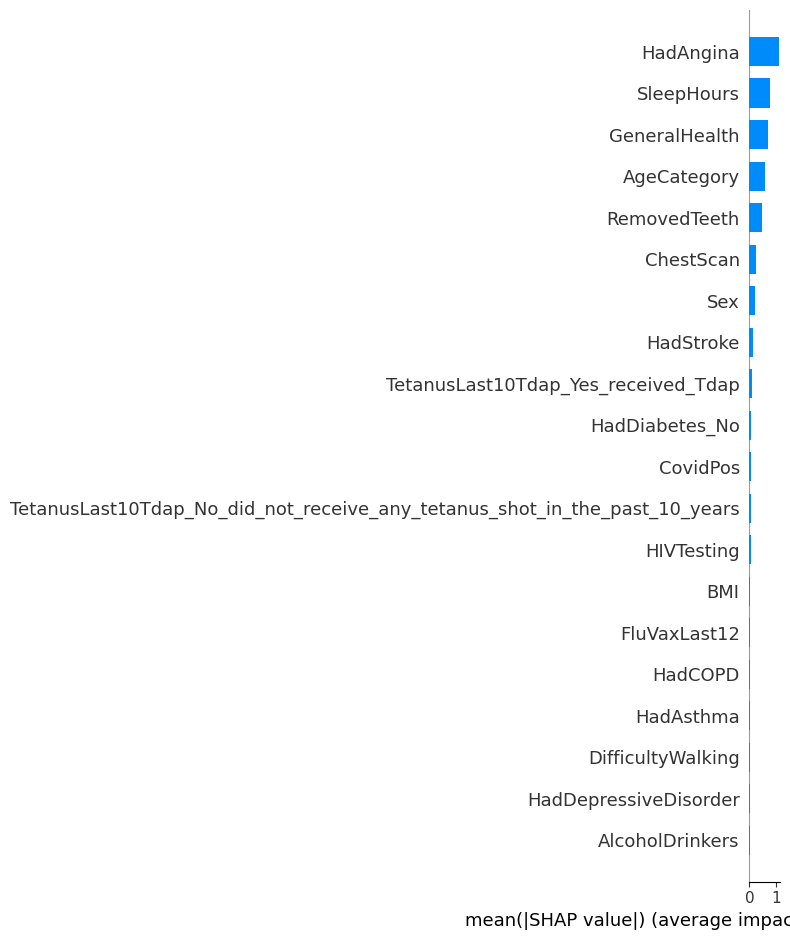

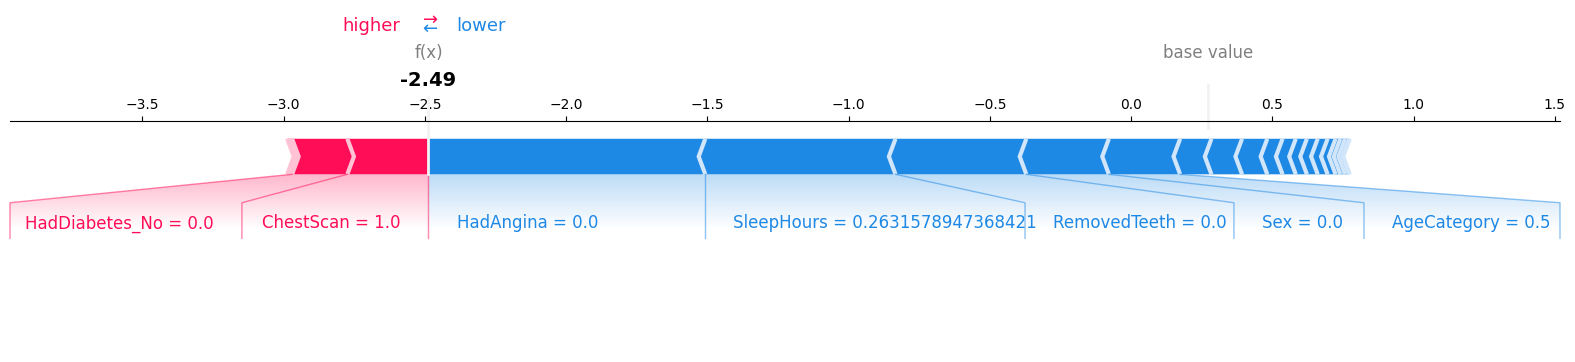

Top contributing features for this prediction:
                       Feature  SHAP Value
12                   ChestScan    0.287263
20              HadDiabetes_No    0.195536
19                    CovidPos    0.008801
17                FluVaxLast12    0.004788
18               PneumoVaxEver    0.003735
21  SmokerStatus_Former_smoker   -0.000277
7                HadSkinCancer   -0.000809
10                HadArthritis   -0.015112
15             AlcoholDrinkers   -0.016504
9        HadDepressiveDisorder   -0.017035
The model predicts this patient has a high risk of heart attack because of:
- ChestScan: contributes 0.2873 to the prediction
- HadDiabetes_No: contributes 0.1955 to the prediction
- CovidPos: contributes 0.0088 to the prediction
- FluVaxLast12: contributes 0.0048 to the prediction
- PneumoVaxEver: contributes 0.0037 to the prediction


In [ ]:
import shap
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load the pickled LightGBM model
with open('lightgbm_model.pkl', 'rb') as model_file:
    bst = pickle.load(model_file)

# Load the pickled test data
with open('X_test.pkl', 'rb') as test_data_file:
    X_test = pickle.load(test_data_file)

# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(bst)

# Calculate SHAP values for the entire test dataset
shap_values = explainer.shap_values(X_test)

# Ensure that shap_values is in the correct format
# If shap_values is a list (binary classification), use shap_values[1] for the positive class
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Visualize the SHAP summary plot
# shap_values should be a matrix of SHAP values for all instances and features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Select an individual instance (e.g., the first instance in the test set)
index = 0  # Change this index to any other row in your test set
instance = X_test.iloc[index]

# Generate the SHAP force plot for this specific instance
shap.force_plot(explainer.expected_value, shap_values[index, :], instance, matplotlib=True)

# Get SHAP values for the selected instance
instance_shap_values = shap_values[index, :]

# Combine feature names with their SHAP values
feature_contributions = pd.DataFrame({
    'Feature': X_test.columns,
    'SHAP Value': instance_shap_values
})

# Sort features by their SHAP value (contribution to prediction)
feature_contributions = feature_contributions.sort_values(by='SHAP Value', ascending=False)

# Print out the top contributing features
print("Top contributing features for this prediction:")
print(feature_contributions.head(10))

# Optionally, explain the prediction in the context of heart health
print("The model predicts this patient has a high risk of heart attack because of:")
for feature, shap_value in feature_contributions.head(5).values:
    print(f"- {feature}: contributes {shap_value:.4f} to the prediction")


In [ ]:
print(f"SHAP Values Shape: {shap_values.shape}")
print(f"X_test Shape: {X_test.shape}")

SHAP Values Shape: (165066, 24)
X_test Shape: (165066, 24)


MODEL PREDICTOR WITH INPUT WXAMPLES

Prediction for the new data: Heart Attack


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


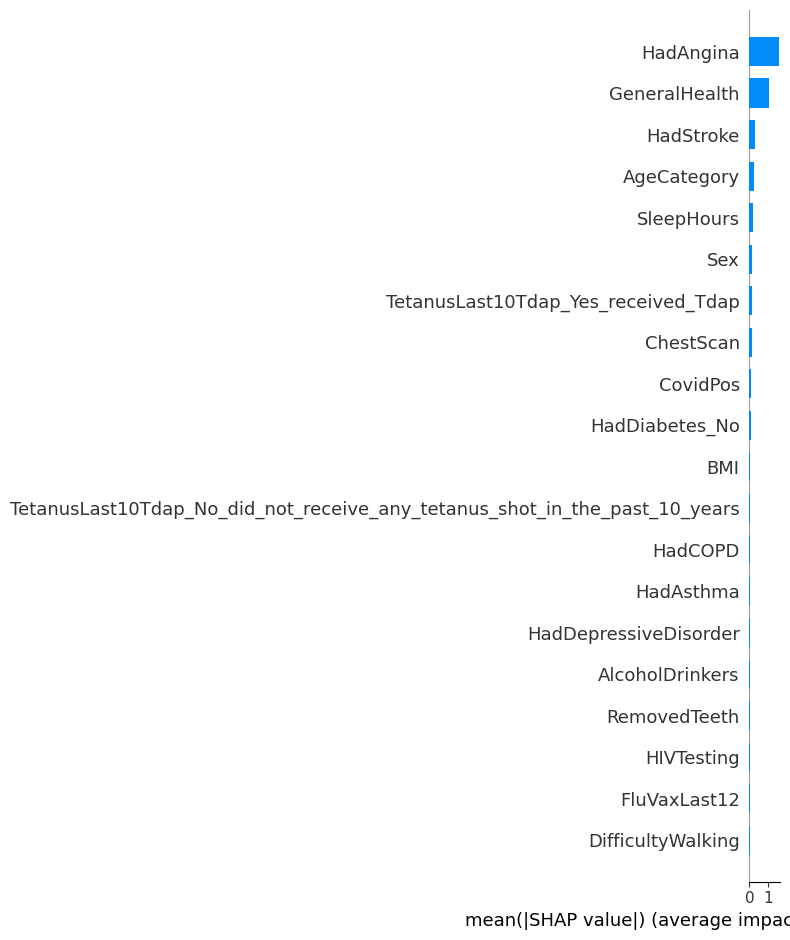

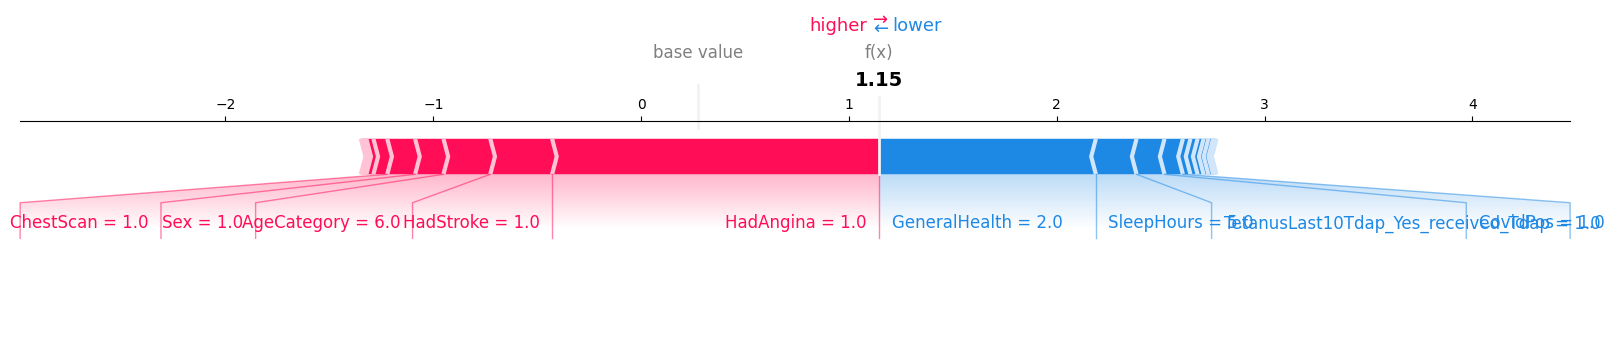

Top contributing features for this prediction:
              Feature  SHAP Value
4           HadAngina    1.574755
5           HadStroke    0.297302
13        AgeCategory    0.225284
0                 Sex    0.136596
12          ChestScan    0.133964
20     HadDiabetes_No    0.066629
8             HadCOPD    0.033960
16         HIVTesting    0.010220
17       FluVaxLast12    0.006018
11  DifficultyWalking    0.004269
The model predicts this patient has a high risk of heart attack because of:
- HadAngina: contributes 1.5748 to the prediction
- HadStroke: contributes 0.2973 to the prediction
- AgeCategory: contributes 0.2253 to the prediction
- Sex: contributes 0.1366 to the prediction
- ChestScan: contributes 0.1340 to the prediction


In [ ]:
import pickle
import shap
import pandas as pd

# Load the pickled LightGBM model
with open('lightgbm_model.pkl', 'rb') as model_file:
    bst = pickle.load(model_file)

# Load the pickled test data for feature scaling and encoding reference
with open('X_test.pkl', 'rb') as test_data_file:
    X_test = pickle.load(test_data_file)
# Create a DataFrame with the new patient data representing high heart attack risk
new_df = pd.DataFrame({
    'Sex': [1],  # Male
    'GeneralHealth': [2],  # Fair health
    'SleepHours': [5],  # 5 hours of sleep per night (low)
    'RemovedTeeth': [1],  # Teeth removed
    'HadAngina': [1],  # History of Angina
    'HadStroke': [1],  # History of Stroke
    'HadAsthma': [1],  # History of Asthma
    'HadSkinCancer': [0],  # No history of Skin Cancer
    'HadCOPD': [1],  # History of COPD
    'HadDepressiveDisorder': [1],  # History of Depressive Disorder
    'HadArthritis': [1],  # History of Arthritis
    'DifficultyWalking': [1],  # Difficulty in walking
    'ChestScan': [1],  # Chest scan performed (potential issue detected)
    'AgeCategory': [6],  # Age category 55-64 (higher risk age group)
    'BMI': [30],  # BMI in the obese range (high risk)
    'AlcoholDrinkers': [1],  # Drinker
    'HIVTesting': [0],  # No HIV testing
    'FluVaxLast12': [1],  # Flu vaccine in the last 12 months
    'PneumoVaxEver': [1],  # Received pneumococcal vaccine
    'CovidPos': [1],  # Tested positive for COVID-19
    'HadDiabetes_No': [0],  # Not marked as no diabetes (potential diabetes)
    'SmokerStatus_Former_smoker': [1],  # Former smoker
    'TetanusLast10Tdap_No_did_not_receive_any_tetanus_shot_in_the_past_10_years': [0],
    'TetanusLast10Tdap_Yes_received_Tdap': [1]  # Received Tdap
})

# Make sure new_df has the same columns as X_test, in the same order
new_df = new_df[X_test.columns]  # Ensure the column order matches X_test

# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(bst)

# Make predictions on the new data
y_pred_proba = bst.predict(new_df)
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred_proba]

# Print the prediction
prediction = 'Heart Attack' if y_pred_binary[0] == 1 else 'No Heart Attack'
print(f"Prediction for the new data: {prediction}")

# Calculate SHAP values for the new data
shap_values = explainer.shap_values(new_df)
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Use the appropriate class SHAP values

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Generate the SHAP force plot for this specific instance
shap.force_plot(explainer.expected_value, shap_values[0], new_df.iloc[0,:], matplotlib=True)

# Get SHAP values for the new instance
instance_shap_values = shap_values[0]

# Combine feature names with their SHAP values
feature_contributions = pd.DataFrame({
    'Feature': new_df.columns,
    'SHAP Value': instance_shap_values
})

# Sort features by their SHAP value (contribution to prediction)
feature_contributions = feature_contributions.sort_values(by='SHAP Value', ascending=False)

# Print out the top contributing features
print("Top contributing features for this prediction:")
print(feature_contributions.head(10))

# Provide an explanation based on the prediction
if y_pred_binary[0] == 1:
    print("The model predicts this patient has a high risk of heart attack because of:")
else:
    print("The model predicts this patient does not have a heart attack. Contributing factors include:")

for feature, shap_value in feature_contributions.head(5).values:
    print(f"- {feature}: contributes {shap_value:.4f} to the prediction")
